# How to use the file_bot_pdf.py module to 
* a)[method .lcoate] find exact match of files, 
* b)[method .copy_to_folder] copy the those files into a new folder, 
* c)[method .clean] delete those files, 
* d)[method .merge_pdf_tree] merge  pdfs in multiple folders hierarchically 
* e)[method .merge_pdf_all] merge all pdfs (ordered by their filenames)


An illustration for file_bot_pdf's  current funtionality: 
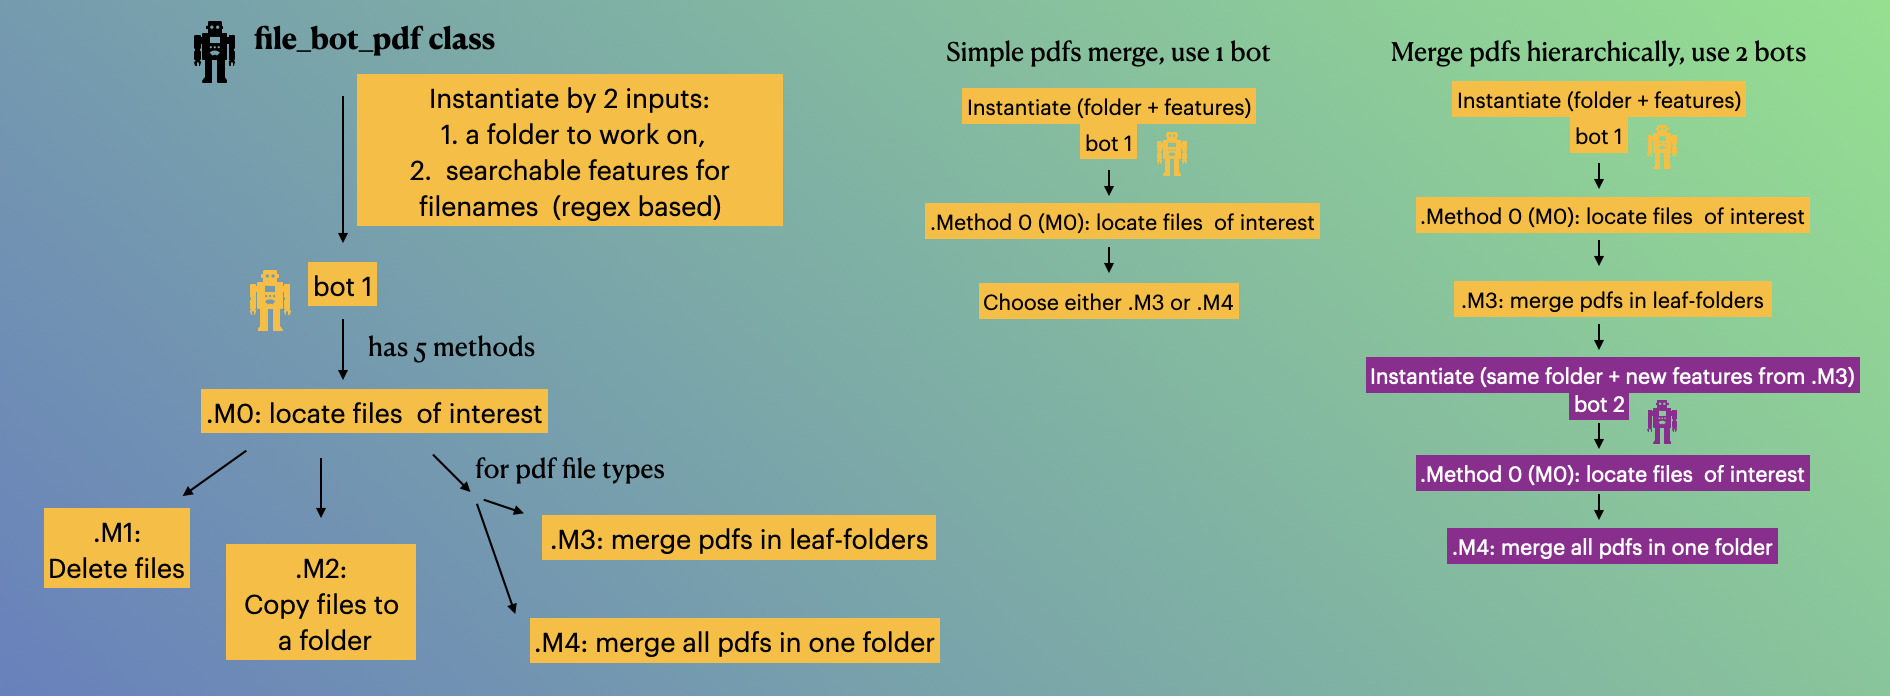

This picture outlines what d) and e) (the right-hand side column of the figure above) can do:
<div>
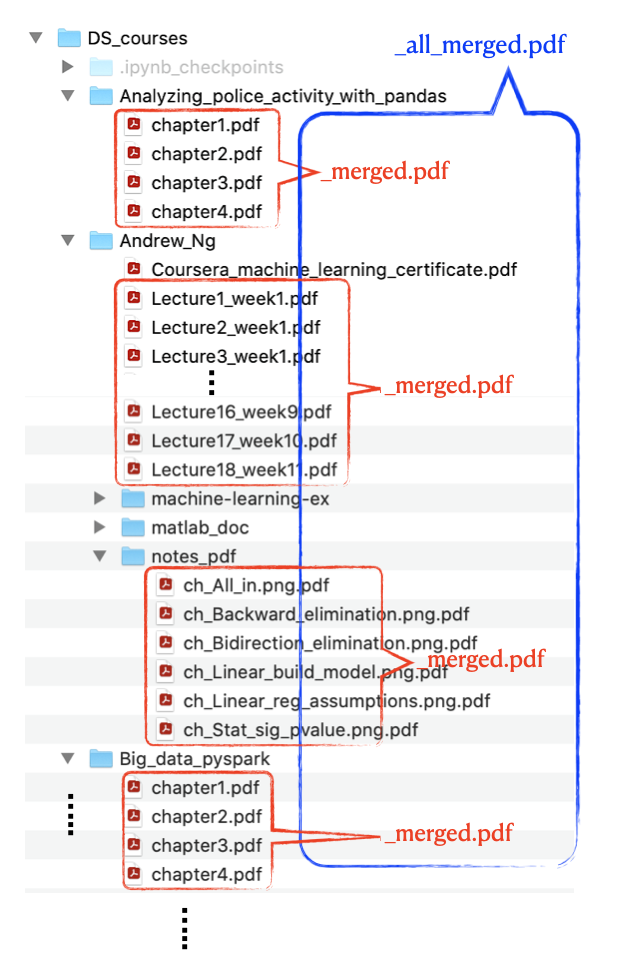
</div>



## First, please backup your files before experimenting with this code!

### 6 lines to find files, and combine pdfs of interest in their respective subfolders:

In [1]:
# Line 1: import the module
import file_bot_pdf as fb

If import fails, it usually means that file_bot_pdf.py is not your python path.  You can check by doing this:
> import sys <br>
> print(sys.path) <br>

To use file_bot_pdf.py,  package PyPDF2 is required, if you don't have it already, then <br>
> pip install PyPDF2

You can solve the problem by doing either of these:
1) move *.py to one of your sys.path. <br>
2) put *.py in your current folder where your script runs. <br>
3) copy and paste file_bot_pdf.py in a .ipynb cell. <br>

You can check the documentation for more details about the file_bot_pdf module, such as how it handles default output filenames, how it sorted files before merging, and what user-specified inputs it can take. It has more flexibility
than what the examples have demonstrated. 
> help(fb)  # prints out all docstrings in the module <br>
> print(fb.FileBots.__doc__)   # check the class docstring <br>
> print(fb.FileBots.locate.__doc__)  # check the function doctring 

In [2]:
# Line 2: your input directory 
dir_in = '/Users/smallpandas/work/learn_py/DS_courses'

In [3]:
# Line 3: search pattern using regex 
reg_pattern = r'(.*chapter.+\.pdf)|(^ch_.*\.pdf)|(.*_slides\.pdf)|(.*week.+\.pdf)'

Regualr expressions are one of the most powerful tools for anything related to words on a computer. The example above will find 4 types of filenames ending with '.pdf':  those contain a 'chapter' word, or with 'ch_', or contains '_slides', or 'week'.  The 'r' before the string means to treat the string as a raw string. 
Other commonly used:
> reg_pattern  = r'.*\.pdf'   # any file ends with .pdf

For a good Youtube tutorial on regex with python, I recommend this: https://www.youtube.com/watch?v=K8L6KVGG-7o


In [4]:
# Line 4: instantiate the bot object, I call it bot1 here
bot1 = fb.FileBots(dir_in, reg_pattern)

In [5]:
# Line 5: use the .locate method to find the files of interest
bot1.locate(show=True)

locate running time is 0.02s


Here is part of printed out from Line 5 when show=True. There are 129 matched  pdfs found under 30 folders. Imagine the chore of having to drag these files around by hand!
The complete paths are masked out for security here:
<div>
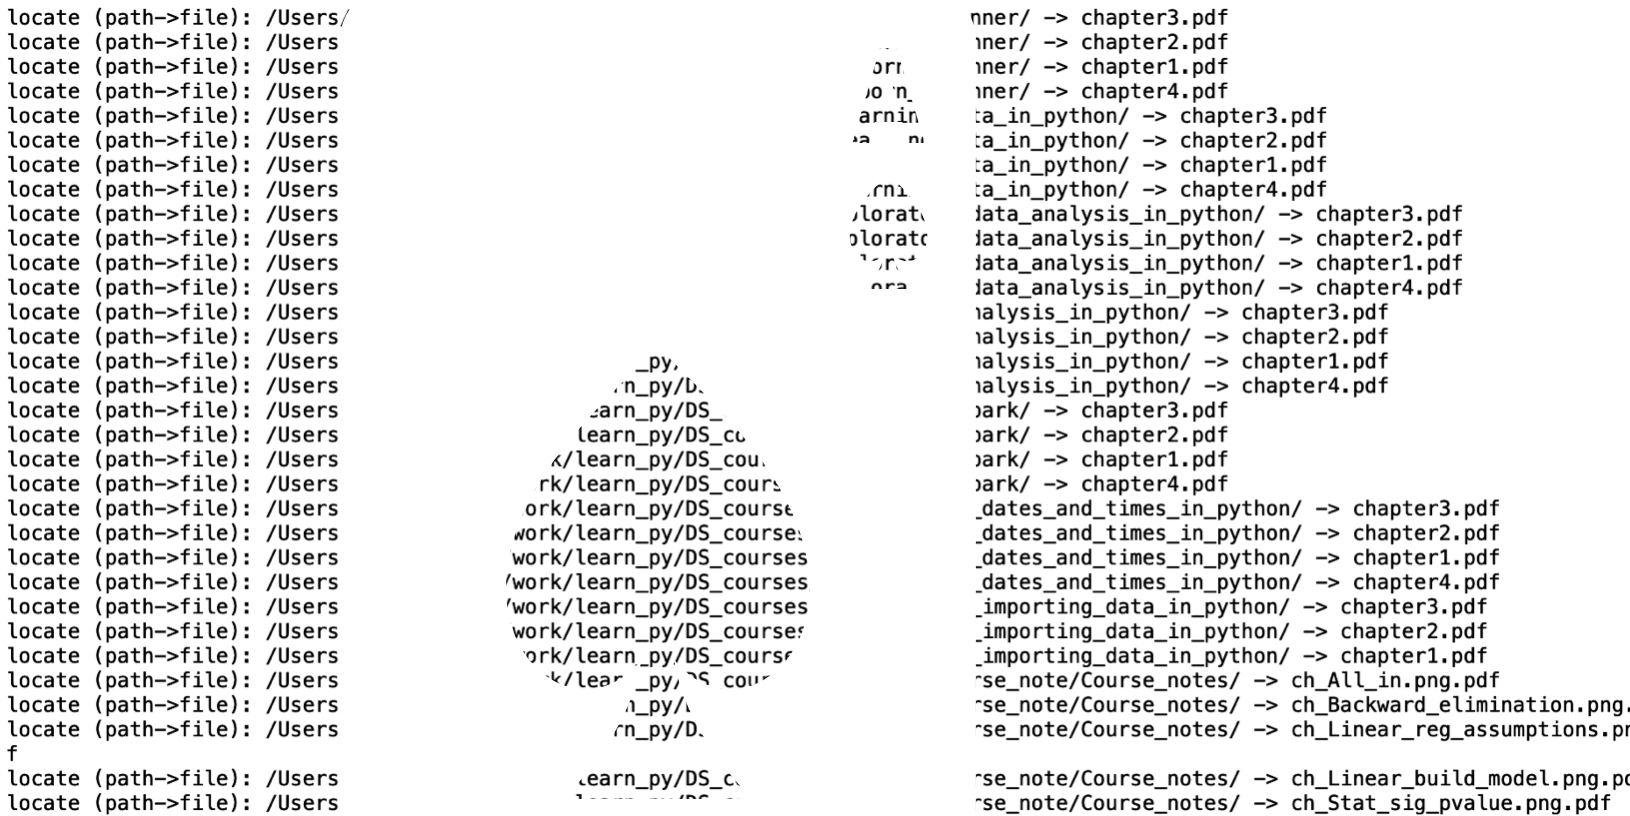
</div>


In [6]:
# Line 6: use the .pdf_merge_tree method merge pdfs in their 'leaf' folder:
bot1.pdf_merge_tree()

Done! Merged 129 pdfs in 30 subfolders
pdf_merge_tree running time is 101.62s


<div>
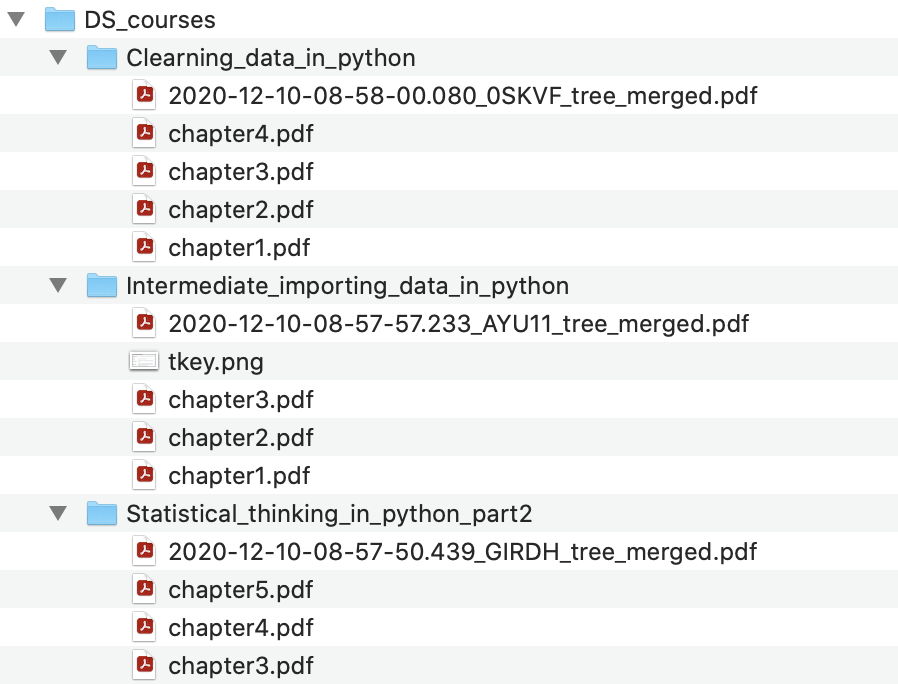
</div>
The output files are now in their separate folders with filename suffix: _tree_merged.pdf

### Optional (e): If you want to merge the pdfs produced by pdf_merge_tree() and produce a giant combined pdf for good reasons (like a book series? :-):

In [ ]:
# Optional: if you want to further merge the *_tree_merged.pdf'files: 
dir_in = '/Users/smallpandas/work/learn_py/DS_courses'
reg_pattern = r'.*_tree_merged.pdf'
bot2 = fb.FileBots(dir_in, reg_pattern)  # pls use a different object name than bot 1
bot2.locate(show=False)
bot2.pdf_merge_all()

<div>
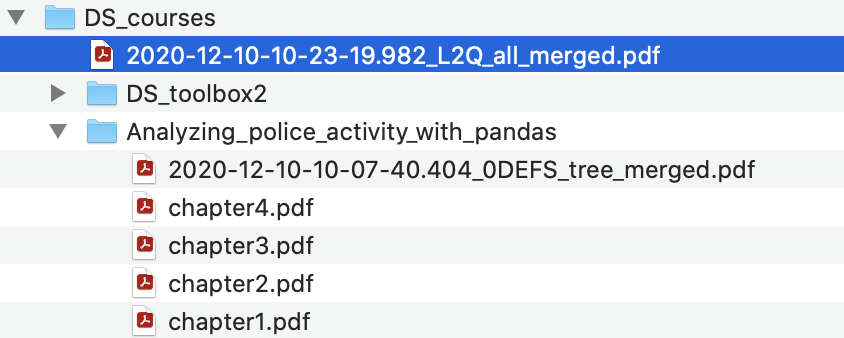
</div>
The file merged in this method will have a suffix: _tree_merged.pdf (see picture on the right).


### The bot can do a simple search and merge all pdfs too. Just tell it where the folder is. 
If you are confident that all pdfs under a folder should be merged alphabetically. Just change the dir_in below, copy
and paste the rest of the lines.

In [ ]:
# Example: just a simple merge of all pdfs under a folder
dir_in = '/path_folder'   # name of the folder where your pdfs are located
bot = fb.FileBots(dir_in, r'.*\.pdf')  # Initiate a bot object 
bot.locate()  # bot finds the files
bot.pdf_merge_all()  # bot merge the files 

# or you replace the last step with:  bot1.pdf_merge_tree()  
# tree = all in this simple case, with different default output filenames

### FileBots can be used to copy files found by .locate to a new folder, see an example below.

In [ ]:
# Example: if you want to copy files to a new folder: 
dir_in = '/Users/smallpandas/work/learn_py/DS_courses/Cloud_computing'
reg_pattern = r'^ch.*\.pdf'
bot4 = fb.FileBots(dir_in, reg_pattern)
bot4.locate(show=False)
bot4.copy_to_folder()

### FileBots can be used to clean up files found by .locate, see an example  below.

In [ ]:
# Example: if you want to remove the *_tree_merged.pdf'files: 
dir_in = '/Users/smallpandas/work/learn_py/DS_courses'
reg_pattern = r'.*_tree_merged.pdf'
bot3 = fb.FileBots(dir_in, reg_pattern)
bot3.locate(show=False)
# removing files is dangerous, a warning message will pop up for you to confirm
bot3.clean()

# Finally, always always prepare a backup before you experiment with any codes that could potentially overwrite/delete/mess up your files!
